In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import pickle 


In [2]:
#reading the csv data
df=pd.read_csv("gold-dataset-sinha-khandait1.csv")

In [3]:
df

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [4]:
df.isnull().sum()

Dates                       0
URL                         0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

In [5]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')

In [6]:
#to describe the dataset
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dates,10570,3761,30-08-2017,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URL,10570,10570,http://www.marketwatch.com/story/april-gold-do...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
News,10570,10570,"april gold down 20 cents to settle at $1,116.1...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price Direction Up,10570.0,NaN,NaN,NaN,0.417408,0.493155,0.0,0.0,0.0,1.0,1.0
Price Direction Constant,10570.0,NaN,NaN,NaN,0.042006,0.200612,0.0,0.0,0.0,0.0,1.0
Price Direction Down,10570.0,NaN,NaN,NaN,0.370104,0.482855,0.0,0.0,0.0,1.0,1.0
Asset Comparision,10570.0,NaN,NaN,NaN,0.189309,0.391773,0.0,0.0,0.0,0.0,1.0
Past Information,10570.0,NaN,NaN,NaN,0.969915,0.17083,0.0,1.0,1.0,1.0,1.0
Future Information,10570.0,NaN,NaN,NaN,0.03018,0.17109,0.0,0.0,0.0,0.0,1.0
Price Sentiment,10570,4,positive,4412,NaN,NaN,NaN,NaN,NaN,NaN,NaN


positive    4412
negative    3814
none        1968
neutral      376
Name: Price Sentiment, dtype: int64

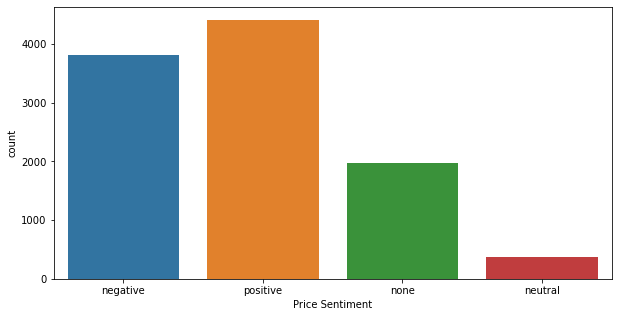

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(df['Price Sentiment'])
df['Price Sentiment'].value_counts()

<AxesSubplot:xlabel='Price Sentiment', ylabel='count'>

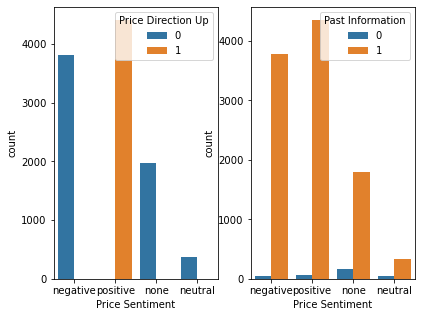

In [8]:
#visualising two colunms againist each other
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.countplot(df['Price Sentiment'], hue=df['Price Direction Up'])
plt.subplot(132)
sns.countplot(df['Price Sentiment'], hue=df['Past Information'])
#plt.show

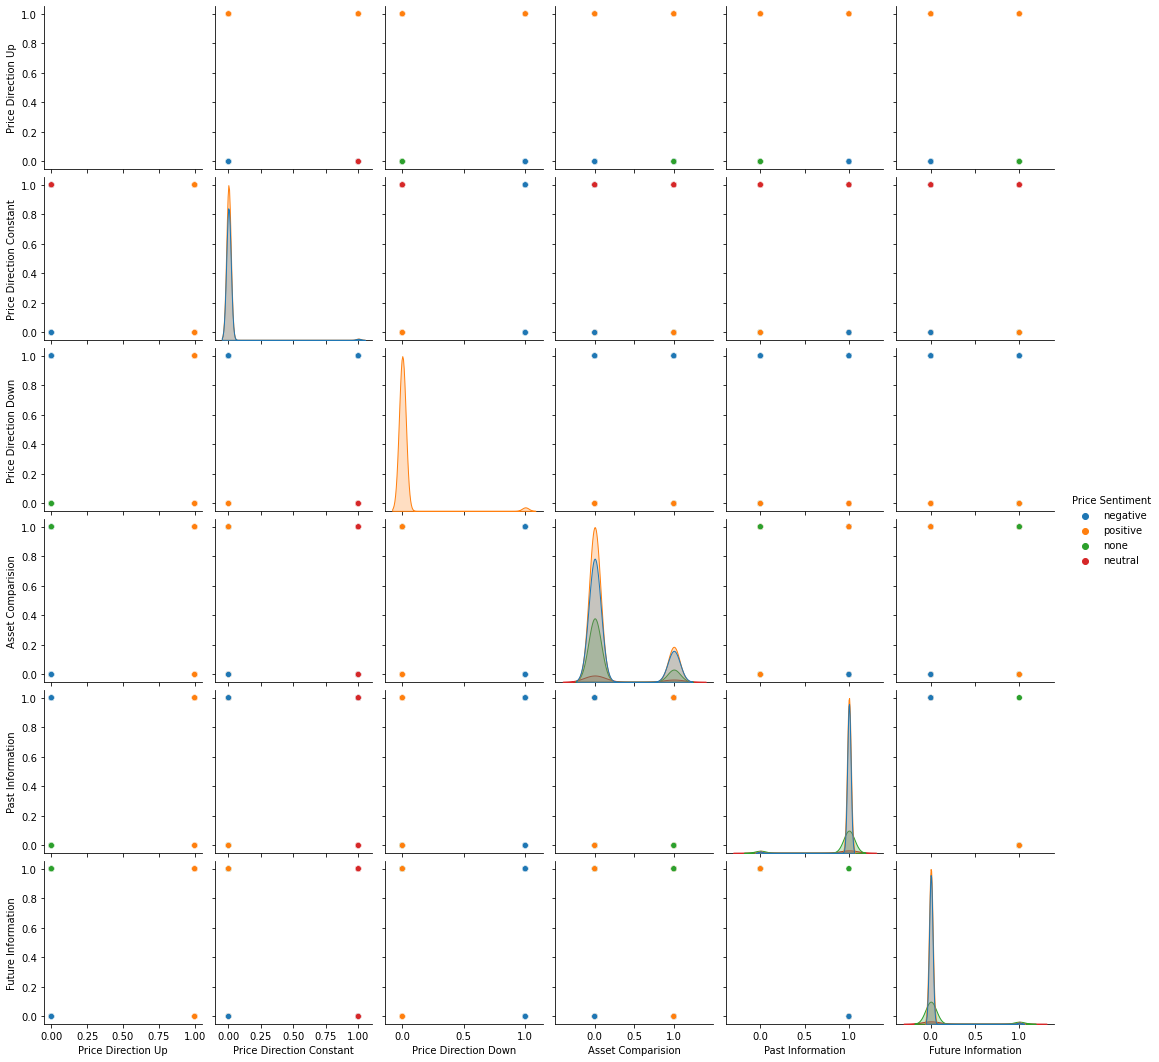

In [9]:
sns.pairplot(df, hue='Price Sentiment')

In [10]:
df['Price Sentiment'].unique()


array(['negative', 'positive', 'none', 'neutral'], dtype=object)

In [11]:
#drop rows with "Price Sentiment" as 'none'
#df = df[df["Price Sentiment"] != 'none']    
df['Price Sentiment'].value_counts() 
df.shape

(10570, 10)

In [12]:
#to check the columns names
df.columns

Index(['Dates', 'URL', 'News', 'Price Direction Up',
       'Price Direction Constant', 'Price Direction Down', 'Asset Comparision',
       'Past Information', 'Future Information', 'Price Sentiment'],
      dtype='object')

In [13]:
#Removing columns
df.drop(columns = ['Dates', 'URL', 'Price Direction Up','Price Direction Constant','Price Direction Down','Asset Comparision','Past Information','Future Information'], inplace = True)

In [14]:
df

,News,Price Sentiment
0,"april gold down 20 cents to settle at $1,116.1...",negative
1,gold suffers third straight daily decline,negative
2,Gold futures edge up after two-session decline,positive
3,dent research : is gold's day in the sun comin...,none
4,"Gold snaps three-day rally as Trump, lawmakers...",negative
...,...,...
10565,gold seen falling from 3-week high this week,negative
10566,dominic frisby : now looks like a good time to...,positive
10567,Gold heading for worst week since November on ...,negative
10568,august gold up $7.60 at $878.80 an ounce on nymex,positive


In [15]:
#Applying the text cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()      #This line converts all characters in the text to lower case.
    text = re.sub('\[.*?\]', '', text)  #This line removes all square bracketed expressions and their contents from the text.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # This line removes all punctuation characters from the text. The string.punctuation variable contains all punctuation characters. 
    text = re.sub('\w*\d\w*', '', text) #This line removes all alphanumeric characters that contain digits from the text.
    text = re.sub('[‘’“”…]', '', text)  #This line removes all curly and ellipsis characters from the text.
    text = re.sub('\n', '', text)  #This line removes all newline characters from the text.
    return text
	

Cleaned_News = lambda x: text_clean_1(x)

In [16]:
#the updated text here
df['Cleaned_News'] = pd.DataFrame(df.News.apply(Cleaned_News))
df.head(10)

,News,Price Sentiment,Cleaned_News
0,"april gold down 20 cents to settle at $1,116.1...",negative,april gold down cents to settle at
1,gold suffers third straight daily decline,negative,gold suffers third straight daily decline
2,Gold futures edge up after two-session decline,positive,gold futures edge up after twosession decline
3,dent research : is gold's day in the sun comin...,none,dent research is golds day in the sun coming ...
4,"Gold snaps three-day rally as Trump, lawmakers...",negative,gold snaps threeday rally as trump lawmakers r...
5,"Dec. gold climbs $9.40, or 0.7%, to settle at ...",positive,dec gold climbs or to settle at
6,"gold falls by rs 25 on sluggish demand, global...",negative,gold falls by rs on sluggish demand global cues
7,"Gold futures fall for the session, but gain fo...",positive,gold futures fall for the session but gain for...
8,"Gold struggles; silver slides, base metals falter",neutral,gold struggles silver slides base metals falter
9,"april gold holds slight gain, up $2.50, or 0.2...",positive,april gold holds slight gain up or at


# Model Training 

In [17]:
#independent varible
x=df['Cleaned_News']
x.head(10)

0                 april gold down  cents to settle at 
1            gold suffers third straight daily decline
2        gold futures edge up after twosession decline
3    dent research  is golds day in the sun coming ...
4    gold snaps threeday rally as trump lawmakers r...
5                   dec gold climbs  or  to settle at 
6     gold falls by rs  on sluggish demand global cues
7    gold futures fall for the session but gain for...
8      gold struggles silver slides base metals falter
9             april gold holds slight gain up  or  at 
Name: Cleaned_News, dtype: object

In [18]:
#dependent varible
y=df['Price Sentiment']
y.head(10)

0    negative
1    negative
2    positive
3        none
4    negative
5    positive
6    negative
7    positive
8     neutral
9    positive
Name: Price Sentiment, dtype: object

In [19]:
#with using of Scikit-learn (sklearn) library to split a dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

print("x_train:",len(x_train))
print("x_test:",len(x_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

x_train: 8456
x_test: 2114
y_train: 8456
y_test: 2114


In [20]:
x_test

4004    gold falls with equities as euro zone talks stuck
2588                   gold silver slip on profit booking
8936    gold marks  session loss palladium ends at low...
2569                     dec gold up  cents at  on globex
8732         gold posts gains as floor trading winds down
                              ...                        
4598              gold falls as much as  in morning trade
5906    gold continues to slide on weak demand silver ...
3774                 december gold down  or  at  an ounce
8528                    dec gold climbs to a  high above 
2400     gold falls in early trade rs  key level to watch
Name: Cleaned_News, Length: 2114, dtype: object

# Model building with Logistic Regression

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2 = LogisticRegression()


In [22]:
#Create a pipeline with two steps:Tf-idf and SVM model
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)
pred_train=model.predict(x_train)
confusion_matrix(predictions, y_test)

array([[701,  15,  26,  29],
       [  1,  50,   1,   2],
       [ 31,   9, 330,  48],
       [ 36,  15,  34, 786]], dtype=int64)

In [23]:
#for Logistic Regression
from sklearn.metrics import classification_report
# assume y_train and pred_train are your true and predicted labels, respectively
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.91      0.91      0.91       769
     neutral       0.93      0.56      0.70        89
        none       0.79      0.84      0.82       391
    positive       0.90      0.91      0.91       865

    accuracy                           0.88      2114
   macro avg       0.88      0.81      0.83      2114
weighted avg       0.88      0.88      0.88      2114



# Model building with SVM

In [24]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
svm=SVC(kernel='linear')
#tvec = TfidfVectorizer()


In [25]:
#from sklearn.pipeline import Pipeline 
#pipeline:- The Pipeline class is a utility class in sklearn that helps to chain multiple steps of data preprocessing and model building into a single object
model2 = Pipeline([('vectorizer',tvec),('classifier',svm)])
model2.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix
predictions2 = model2.predict(x_test)
pred2_train=model2.predict(x_train)
confusion_matrix(predictions2, y_test)


array([[694,   8,  23,  32],
       [  4,  57,   2,   7],
       [ 32,  11, 331,  45],
       [ 39,  13,  35, 781]], dtype=int64)

In [26]:
#for SVM
from sklearn.metrics import classification_report
# assume y_train and pred2_train are your true and predicted labels, respectively
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

    negative       0.92      0.90      0.91       769
     neutral       0.81      0.64      0.72        89
        none       0.79      0.85      0.82       391
    positive       0.90      0.90      0.90       865

    accuracy                           0.88      2114
   macro avg       0.86      0.82      0.84      2114
weighted avg       0.88      0.88      0.88      2114



# Model prediciton 

In [27]:
#Logistic Regression
from sklearn.metrics import accuracy_score
print("Accuracy_test : ", accuracy_score(predictions, y_test))
print("Accuracy_train : ", accuracy_score(pred_train, y_train))


Accuracy_test :  0.8831598864711447
Accuracy_train :  0.9331835383159887


In [28]:
#SVM
#from sklearn.metrics import accuracy_score
print("Accuracy_test: ", accuracy_score(predictions2, y_test))
print("Accuracy_train : ", accuracy_score(pred2_train, y_train))


Accuracy_test:  0.881267738883633
Accuracy_train :  0.9427625354777672


# Trying on new news headlines 

In [29]:
example = ["gold to trade in 28670-29160 range: achiievers equities"]
result = model.predict(example)
print(result)

['neutral']


In [30]:
example = ["gold to trade in 28670-29160 range: achiievers equities"]
result = model2.predict(example)
print(result)

['neutral']


In [31]:
example = ["can investment in gold, sensex & ppfs give the same returns?"]
result = model.predict(example)
print(result)

['none']


In [32]:
example = ["can investment in gold, sensex & ppfs give the same returns?"]
result = model2.predict(example)
print(result)

['none']


In [33]:
example = ["Gold futures edge up after two-session decline."]
result = model.predict(example)
print(result)

['positive']


In [34]:
example = ["Gold futures edge up after two-session decline."]
result = model2.predict(example)
print(result)

['positive']


In [35]:
example = ["Gold price expected to remain steady"]
result = model.predict(example)
print(result)

['neutral']


In [36]:
example = ["Gold price expected to remain steady"]
result = model2.predict(example)
print(result)

['neutral']


In [37]:
example = ["What is Article 356, which Modi says Indira Gandhi misused 50 times?"]
result = model.predict(example)
print(result)

['none']


In [38]:
example = ["Gold futures down at Rs 30,244"]
result = model2.predict(example)
print(result)

['negative']


# saving the model

In [39]:
#import pickle 
#pickle.dump(model,open('goldnewsanalysis.pkl','wb'))